In [39]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


In [38]:
df_ccrb = pd.read_excel("/Users/nbuxton/ccrb.xlsx", sheetname=0)
df_ccrb.head()

,DateStamp,UniqueComplaintId,Close_Year,Received_Year,Borough_of_Occurrence,Is_Full_Investigation,Complaint_Has_Video_Evidence,Complaint _Filed_Mode,Complaint_Filed_Place,Complaint_Contains_Stop_&_Frisk_Allegations,Incident_Location,Incident_Year,Encounter_Outcome,Reason_For_Initial_Contact,Allegation_FADO_Type,Allegation_Description
0,2017-02-07,6,2006,2006,Brooklyn,False,False,Phone,IAB,False,Street/highway,2006,No Arrest or Summons,PD suspected C/V of violation/crime - street,Discourtesy,Action
1,2017-02-07,11,2006,2006,Bronx,False,False,Phone,IAB,False,Street/highway,2006,Arrest,Other,Force,Physical force
2,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Strip-searched
3,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Seizure of property
4,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Search (of person)


In [5]:
df_ccrb.describe()

,UniqueComplaintId,Close_Year,Received_Year,Incident_Year
count,206718.000000,206718.000000,206718.000000,206718.000000
mean,35213.534061,2010.471294,2009.885878,2009.854526
std,20297.666987,3.162415,3.252095,3.250565
min,1.000000,2006.000000,1999.000000,1999.000000
25%,17578.000000,2008.000000,2007.000000,2007.000000
50%,35261.500000,2010.000000,2009.000000,2009.000000
75%,52825.750000,2013.000000,2013.000000,2012.000000
max,70245.000000,2017.000000,2017.000000,2017.000000


In [40]:
# Count the unique complaint ID
# Answer to Q1
df_ccrb_na = df_ccrb.dropna()
total_complaints = df_ccrb_na['UniqueComplaintId'].count()
total_complaints

202390

In [41]:
df_ccrb_borough_counts = df_ccrb_na.groupby(['Borough_of_Occurrence']).size().reset_index(name="Number of Complaints").sort_values(by="Number of Complaints", ascending=False)
df_ccrb_borough_counts

,Borough_of_Occurrence,Number of Complaints
1,Brooklyn,71580
0,Bronx,49135
2,Manhattan,41804
4,Queens,30637
5,Staten Island,9059
3,Outside NYC,175


In [42]:
# append the total count
totals = {'Total Complaints': [total_complaints]*len(df_ccrb_borough_counts)}
totals_df = pd.DataFrame(data=totals)

df_ccrb_borough_counts_with_total = df_ccrb_borough_counts.join(totals_df)
df_ccrb_borough_counts_with_total

,Borough_of_Occurrence,Number of Complaints,Total Complaints
1,Brooklyn,71580,202390
0,Bronx,49135,202390
2,Manhattan,41804,202390
4,Queens,30637,202390
5,Staten Island,9059,202390
3,Outside NYC,175,202390


In [43]:
# append the perf
df_ccrb_borough_counts_with_total['Complaint Percent'] = df_ccrb_borough_counts_with_total['Number of Complaints']/df_ccrb_borough_counts_with_total['Total Complaints']*100
df_ccrb_borough_counts_with_total

,Borough_of_Occurrence,Number of Complaints,Total Complaints,Complaint Percent
1,Brooklyn,71580,202390,35.367360
0,Bronx,49135,202390,24.277385
2,Manhattan,41804,202390,20.655171
4,Queens,30637,202390,15.137606
5,Staten Island,9059,202390,4.476012
3,Outside NYC,175,202390,0.086467


In [45]:
df_ccrb_borough_counts_with_total['Complaint Percent'].max()

35.367360047433174

In [46]:
# answer to q2
df_ccrb_borough_counts_with_total.loc[df_ccrb_borough_counts_with_total['Complaint Percent'].idxmax()]

Borough_of_Occurrence    Brooklyn
Number of Complaints        71580
Total Complaints           202390
Complaint Percent         35.3674
Name: 1, dtype: object

In [47]:
# start q3
# create a populations data frame from scratch
population_data = {
    'Borough_of_Occurrence': ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', "Staten Island"],
    'Population': [1664727, 1471160, 2648771, 2358582, 479458]
}
populations_df = pd.DataFrame(data=population_data)
populations_df

,Borough_of_Occurrence,Population
0,Manhattan,1664727
1,Bronx,1471160
2,Brooklyn,2648771
3,Queens,2358582
4,Staten Island,479458


In [48]:
borough_counts_with_population_df = df_ccrb_borough_counts_with_total.merge(populations_df, on='Borough_of_Occurrence', how='inner')
borough_counts_with_population_df

,Borough_of_Occurrence,Number of Complaints,Total Complaints,Complaint Percent,Population
0,Brooklyn,71580,202390,35.367360,2648771
1,Bronx,49135,202390,24.277385,1471160
2,Manhattan,41804,202390,20.655171,1664727
3,Queens,30637,202390,15.137606,2358582
4,Staten Island,9059,202390,4.476012,479458


In [50]:
bcwp_df = borough_counts_with_population_df
bcwp_df['Per 100k'] = bcwp_df['Number of Complaints'] / bcwp_df['Population'] * 100000
bcwp_df

,Borough_of_Occurrence,Number of Complaints,Total Complaints,Complaint Percent,Population,Per 100k
0,Brooklyn,71580,202390,35.367360,2648771,2702.385370
1,Bronx,49135,202390,24.277385,1471160,3339.881454
2,Manhattan,41804,202390,20.655171,1664727,2511.162491
3,Queens,30637,202390,15.137606,2358582,1298.958442
4,Staten Island,9059,202390,4.476012,479458,1889.425143


In [51]:
# answer to q3
# pick the highest per-100k rate of stop & frisk
bcwp_df.loc[bcwp_df['Per 100k'].idxmax()]

Borough_of_Occurrence      Bronx
Number of Complaints       49135
Total Complaints          202390
Complaint Percent        24.2774
Population               1471160
Per 100k                 3339.88
Name: 1, dtype: object

In [52]:
# answer to q4
average_close_time_in_years = (df_ccrb['Close_Year']-df_ccrb["Received_Year"]).mean()
average_close_time_in_years

0.58541588057159999

In [53]:
# start q5
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_ccrb.head()

,DateStamp,UniqueComplaintId,Close_Year,Received_Year,Borough_of_Occurrence,Is_Full_Investigation,Complaint_Has_Video_Evidence,Complaint _Filed_Mode,Complaint_Filed_Place,Complaint_Contains_Stop_&_Frisk_Allegations,Incident_Location,Incident_Year,Encounter_Outcome,Reason_For_Initial_Contact,Allegation_FADO_Type,Allegation_Description
0,2017-02-07,6,2006,2006,Brooklyn,False,False,Phone,IAB,False,Street/highway,2006,No Arrest or Summons,PD suspected C/V of violation/crime - street,Discourtesy,Action
1,2017-02-07,11,2006,2006,Bronx,False,False,Phone,IAB,False,Street/highway,2006,Arrest,Other,Force,Physical force
2,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Strip-searched
3,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Seizure of property
4,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Search (of person)


In [54]:
ccrb_by_year = df_ccrb_na.groupby(['Received_Year']).size().reset_index(name="Number_of_Complaints").sort_values(by="Number_of_Complaints", ascending=False)
ccrb_by_year

,Received_Year,Number_of_Complaints
7,2007,24006
6,2006,23272
8,2008,21685
9,2009,20807
10,2010,17294
11,2011,16152
12,2012,15397
13,2013,14563
14,2014,13529
15,2015,12503


In [55]:
# Complaints about stop and frisk have been declining.
# Use linear regression from the year complaints about stop and frisk peaked through 2016 (inclusive)
# to predict how many stop and frisk incidents in 2018 will eventually lead to a complaint. 
# For this question, only consider unique complaints with complete information. 
# Remember that the count of complaints must be an integer (round to nearest).

# first filter the stop and frisk
saf_df = df_ccrb.loc[df_ccrb['Complaint_Contains_Stop_&_Frisk_Allegations'] == True]
saf_df.head()

,DateStamp,UniqueComplaintId,Close_Year,Received_Year,Borough_of_Occurrence,Is_Full_Investigation,Complaint_Has_Video_Evidence,Complaint _Filed_Mode,Complaint_Filed_Place,Complaint_Contains_Stop_&_Frisk_Allegations,Incident_Location,Incident_Year,Encounter_Outcome,Reason_For_Initial_Contact,Allegation_FADO_Type,Allegation_Description
2,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Strip-searched
3,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Seizure of property
4,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Search (of person)
5,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Question and/or stop
6,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Threat of arrest


In [56]:
# 1/ drop incomplete complaints
# 2/ group by year
# 3/ remove all years > 2016
saf_complete_df = saf_df.dropna()
saf_counts_df = saf_complete_df.groupby(['Received_Year']).size().reset_index(name="Number of Complaints").sort_values(by="Received_Year", ascending=False)
saf_counts_df_2016 = saf_counts_df.loc[saf_counts_df['Received_Year'] <= 2016]
saf_counts_df_2016

,Received_Year,Number of Complaints
15,2016,3609
14,2015,4220
13,2014,4472
12,2013,5338
11,2012,5990
10,2011,6433
9,2010,7115
8,2009,8804
7,2008,9372
6,2007,11387


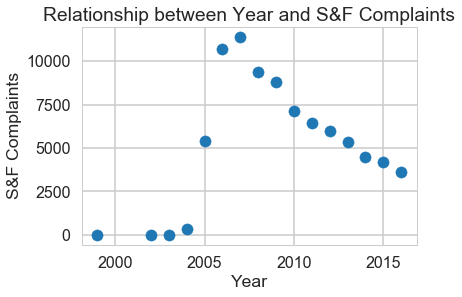

In [57]:
# make a graph and display it
plt.scatter(saf_counts_df_2016['Received_Year'], saf_counts_df_2016['Number of Complaints'])
plt.xlabel("Year")
plt.ylabel("S&F Complaints")
plt.title("Relationship between Year and S&F Complaints")
plt.show()

In [58]:
# now we build a predictor
# we should probably remove the outliers 
# before 2006. it looks like reporting methodology 
# would have changed
saf_counts_df_2006_2016 = saf_counts_df_2016.loc[saf_counts_df_2016['Received_Year'] >= 2006]
saf_counts_df_2006_2016

,Received_Year,Number of Complaints
15,2016,3609
14,2015,4220
13,2014,4472
12,2013,5338
11,2012,5990
10,2011,6433
9,2010,7115
8,2009,8804
7,2008,9372
6,2007,11387


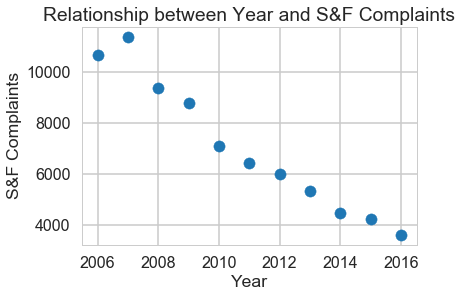

In [59]:
# make a graph and display it
plt.scatter(saf_counts_df_2006_2016['Received_Year'], saf_counts_df_2006_2016['Number of Complaints'])
plt.xlabel("Year")
plt.ylabel("S&F Complaints")
plt.title("Relationship between Year and S&F Complaints")
plt.show()

In [60]:
# now we build our predictor!
from sklearn.linear_model import LinearRegression
import math
lm = LinearRegression()
x = saf_counts_df_2006_2016['Received_Year'].values
y = saf_counts_df_2006_2016['Number of Complaints'].values
length = len(x)
# reshape for LR
x = x.reshape(length, 1)
y = y.reshape(length, 1)
lm.fit(x, y)

predicted_2018 = lm.predict(2018)
predicted_2018
predicted_2019 = lm.predict(2019)
predicted_2019[0][0]
print("Predicted 2018=%s" % int(predicted_2018[0][0]))
print("Predicted 2019=%s" % int(predicted_2019[0][0]))

Predicted 2018=1512
Predicted 2019=723


In [61]:
# predictor with all data (outliers not removed)
from sklearn.linear_model import LinearRegression
import math
lm = LinearRegression()
x = saf_counts_df_2016['Received_Year'].values
y = saf_counts_df_2016['Number of Complaints'].values
length = len(x)
# reshape for LR
x = x.reshape(length, 1)
y = y.reshape(length, 1)
lm.fit(x, y)

predicted_2018 = lm.predict(2018)
predicted_2018
predicted_2019 = lm.predict(2019)
predicted_2019[0][0]
print("Predicted 2018=%s" % int(predicted_2018[0][0]))
print("Predicted 2019=%s" % int(predicted_2019[0][0]))

# as you can see in the results, it will predict 
# higher than 2016, even though there is an obvious downtrend

# TODO: change narrative to try this version first

Predicted 2018=7682
Predicted 2019=7940


In [64]:
# chi-sq question

# Calculate the chi-square test statistic for testing whether a complaint is more likely to receive a
# full investigation when it has video evidence. For this question, only consider unique complaints with
# complete information.

# first filter unique complaints
unique_ccrb_df = df_ccrb.dropna()
unique_ccrb_df.head()

# full_investigations_df = unique_ccrb_df.loc[unique_ccrb_df['Complaint_Has_Video_Evidence'] == True]

with_ve_df = unique_ccrb_df.loc[unique_ccrb_df['Complaint_Has_Video_Evidence'] == True]
print("Complaints with VE %s" % len(with_ve_df))

fi_with_ve_df = with_ve_df.loc[with_ve_df['Is_Full_Investigation'] == True]
print("Complaints with VE and FI %s" % len(fi_with_ve_df))

no_fi_with_ve_df = with_ve_df.loc[with_ve_df['Is_Full_Investigation'] == False]
print("Complaints with VE and no FI %s" % len(no_fi_with_ve_df))

print("---")

without_ve_df = unique_ccrb_df.loc[unique_ccrb_df['Complaint_Has_Video_Evidence'] == False]
print("Complaints without VE %s" % len(without_ve_df))

fi_without_ve_df = without_ve_df.loc[without_ve_df['Is_Full_Investigation'] == True]
print("Complaints without VE and FI %s" % len(fi_without_ve_df))

no_fi_without_ve_df = without_ve_df.loc[without_ve_df['Is_Full_Investigation'] == False]
print("Complaints without VE and no FI %s" % len(no_fi_without_ve_df))

#                          | Full Investigation     | No Full Investigation
# Complaints with Video    |  7742                  | 1616
# Complaints without Video |  89256                 | 103776

group = [[7742, 1616], [89256, 103776]]

import scipy.stats
chi2, p, ddof, expected = scipy.stats.chi2_contingency(group, correction=True)
print("---")
print("Chi^2:          %s" % chi2)
print("p               %s" % p)
print("Degrees Freedom %s" % ddof)
print("Expected        %s" % expected)


# https://stats.stackexchange.com/questions/104264/is-this-normal-to-have-big-value-of-chi-squared

# The chi-sq is very high, so we checked 
# Intuitively since we have large numbers and 
# the chi-sq is going to be high 

Complaints with VE 9358
Complaints with VE and FI 7742
Complaints with VE and no FI 1616
---
Complaints without VE 193032
Complaints without VE and FI 89256
Complaints without VE and no FI 103776
---
Chi^2:          4761.04380122
p               0.0
Degrees Freedom 1
Expected        [[   4484.94137062    4873.05862938]
 [  92513.05862938  100518.94137062]]
